**Assignment_2: Adult Data Set**

Extraction was done by Barry Becker from the 1994 Census database.
 
Prediction task is to determine whether a person makes over 50K a year.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pip install xai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 8.1 MB/s 
     |████████████████████████████████| 28.5 MB 1.3 MB/s 
     |████████████████████████████████| 11.3 MB 48.8 MB/s 
     |████████████████████████████████| 15.7 MB 37.8 MB/s 
     |████████████████████████████████| 23.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstal

In [3]:
df=pd.read_csv("/content/Adult Data.csv.zip")

In [4]:
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.columns=["Age","Type of Job","ID","Qualification","Education-num","Marital-Status","Occupation","Family","Race","Gender","Capital_gain","Capital_loss","Hours_per_week","Native_country","Salary"]

In [6]:
df.head()

,Age,Type of Job,ID,Qualification,Education-num,Marital-Status,Occupation,Family,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Native_country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.Salary.value_counts()

 <=50K    24719
 >50K      7841
Name: Salary, dtype: int64

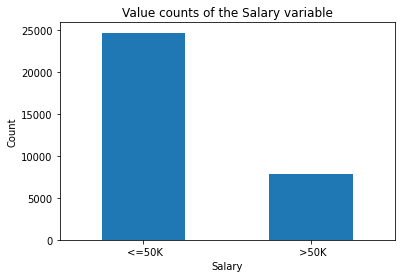

In [8]:
df.Salary.value_counts().plot(kind="bar")
plt.title("Value counts of the Salary variable")
plt.xlabel("Salary")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

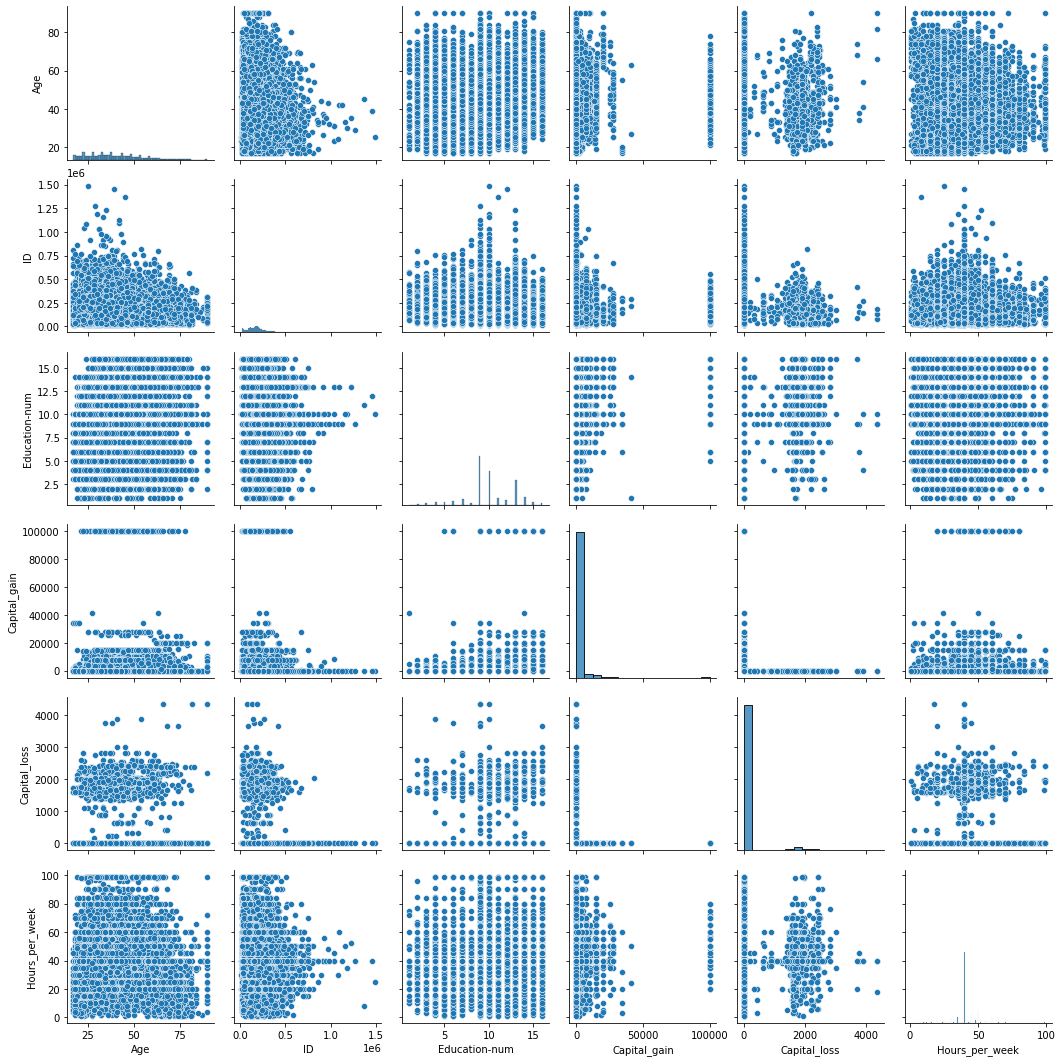

In [9]:
sns.pairplot(df)

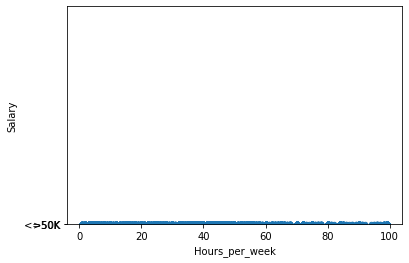

In [13]:
#bivariate analysis Salary/Hours_per_week
var = 'Hours_per_week'
data = pd.concat([df['Salary'], df[var]], axis=1)
data.plot.scatter(x=var, y='Salary', ylim=(0,10000));

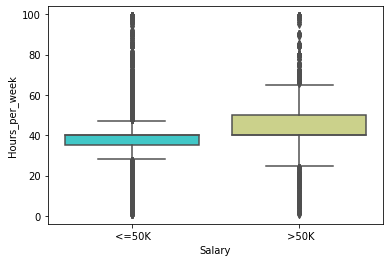

In [14]:
sns.boxplot(x='Salary',y='Hours_per_week',data=df,palette='rainbow')

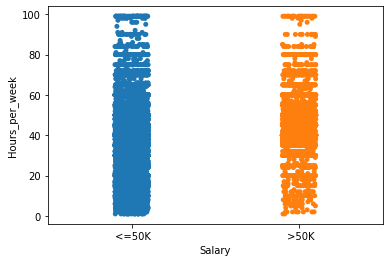

In [15]:
sns.stripplot(x="Salary", y="Hours_per_week", data=df)


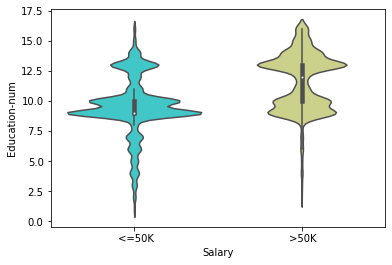

In [16]:
sns.violinplot(x="Salary", y="Education-num", data=df,palette='rainbow')

In [17]:
df.dtypes

Age                int64
Type of Job       object
ID                 int64
Qualification     object
Education-num      int64
Marital-Status    object
Occupation        object
Family            object
Race              object
Gender            object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Salary            object
dtype: object

In [18]:
df['Type of Job'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df['Qualification'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [20]:
df['Marital-Status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [21]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
df['Family'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [23]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [24]:
df['Gender'].unique()

array([' Male', ' Female'], dtype=object)

In [25]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['Type of Job','Qualification','Marital-Status','Occupation','Family','Race',
    'Gender','Native_country','Salary']]=df[['Type of Job','Qualification','Marital-Status',
                                             'Occupation','Family','Race','Gender','Native_country','Salary']].apply(le.fit_transform)

In [28]:
df.dtypes

Age               int64
Type of Job       int64
ID                int64
Qualification     int64
Education-num     int64
Marital-Status    int64
Occupation        int64
Family            int64
Race              int64
Gender            int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Salary            int64
dtype: object

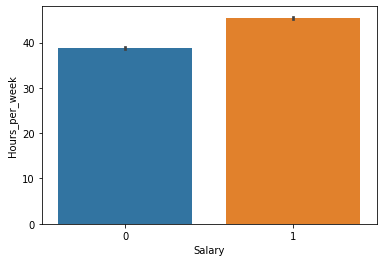

In [36]:
sns.barplot(x='Salary', y='Hours_per_week', data=df);

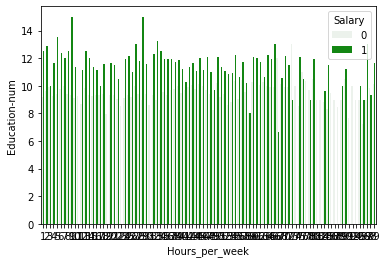

In [40]:
#barplot
ax=sns.barplot(x='Hours_per_week',
               y='Education-num',
               data=df,ci=False,
               hue='Salary',color='#009900')

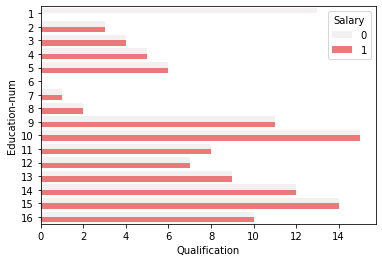

In [42]:
#barplot
ax=sns.barplot(x='Qualification',
               y='Education-num',orient='h',
               data=df,ci=False,
               hue='Salary',color='#ff6666')

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
x=df.drop('Salary',axis=1)

In [45]:
y=df.Salary

In [46]:
#apply SelectKBest class to extract top 10 best features
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)

In [47]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [48]:
#concat two dataframe
feature_score=pd.concat([df_columns,df_scores],axis=1)
feature_score.columns=['specs','score']

In [49]:
feature_score

,specs,score
0,Age,8.600737e+03
1,Type of Job,4.757828e+01
2,ID,1.718124e+05
3,Qualification,2.979004e+02
4,Education-num,2.401748e+03
5,Marital-Status,1.123319e+03
6,Occupation,5.042459e+02
7,Family,3.659284e+03
8,Race,3.303798e+01
9,Gender,5.025085e+02


In [50]:
print(feature_score.nlargest(10,'score'))

             specs         score
10    Capital_gain  8.219773e+07
11    Capital_loss  1.372049e+06
2               ID  1.718124e+05
0              Age  8.600737e+03
12  Hours_per_week  6.476435e+03
7           Family  3.659284e+03
4    Education-num  2.401748e+03
5   Marital-Status  1.123319e+03
6       Occupation  5.042459e+02
9           Gender  5.025085e+02


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [52]:
print(model.feature_importances_)

[0.15398163 0.04408019 0.16371823 0.03744899 0.08486303 0.07626129
 0.07621615 0.08789374 0.01428849 0.02751082 0.09270723 0.02918743
 0.09415891 0.01768388]


In [53]:
df.columns

Index(['Age', 'Type of Job', 'ID', 'Qualification', 'Education-num',
       'Marital-Status', 'Occupation', 'Family', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Salary'],
      dtype='object')

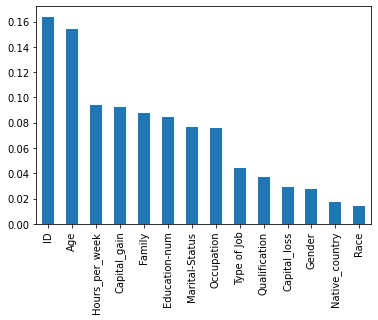

In [54]:
#plot graph of feature importance
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(15).plot(kind='bar')
plt.show()

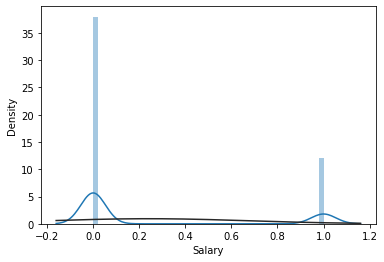

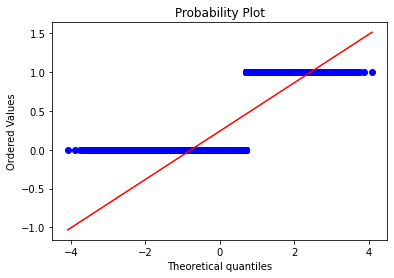

In [55]:
#histogram and normal probability plot
sns.distplot(df['Salary'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Salary'], plot=plt)

In [57]:
df.isna().sum()

Age               0
Type of Job       0
ID                0
Qualification     0
Education-num     0
Marital-Status    0
Occupation        0
Family            0
Race              0
Gender            0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Salary            0
dtype: int64

In [58]:
df['Hours_per_week'].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

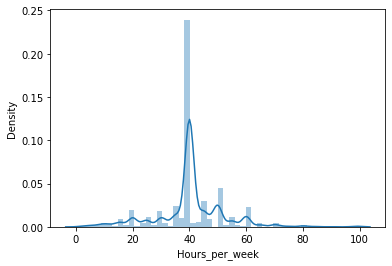

In [59]:
sns.distplot(df['Hours_per_week']);

In [60]:
#skewness and kurtosis
print("Skewness: %f" % df['Hours_per_week'].skew())
print("Kurtosis: %f" % df['Hours_per_week'].kurt())

Skewness: 0.227636
Kurtosis: 2.916505


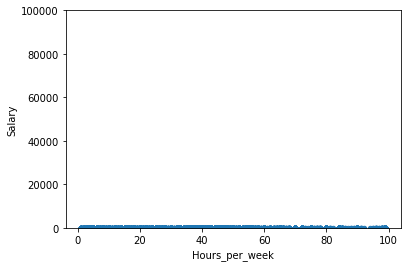

In [61]:
#scatter plot Hours_per_week/Salary
var = 'Hours_per_week'
data = pd.concat([df['Salary'], df[var]], axis=1)
data.plot.scatter(x=var, y='Salary', ylim=(0,100000));

In [62]:
df.columns

Index(['Age', 'Type of Job', 'ID', 'Qualification', 'Education-num',
       'Marital-Status', 'Occupation', 'Family', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Salary'],
      dtype='object')

In [63]:
categorical_cols = ["Gender", "Type of Job", "Qualification", "Education-num", "Marital-Status",
                   "Occupation", "Family", "Race", "Salary"]

In [64]:
target = "Salary"
protected = ["Race", "Gender", "Age"]

In [65]:
import xai
import xai.data

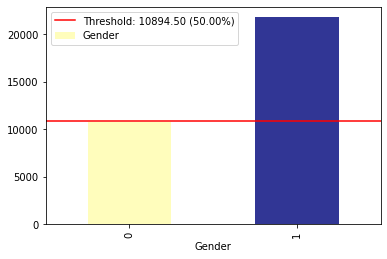

'0-above and equalto 50k \n1-below 50k'

In [66]:
df_groups = xai.imbalance_plot(df, "Gender", categorical_cols=categorical_cols)

'''0-above and equalto 50k 
1-below 50k'''


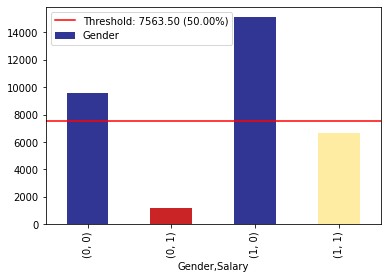

In [67]:
groups = xai.imbalance_plot(df, "Gender", "Salary", categorical_cols=categorical_cols)

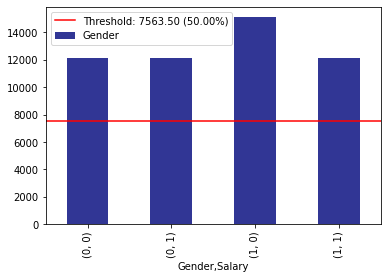

In [68]:
bal_df = xai.balance(df, "Gender", "Salary", upsample=0.8, categorical_cols=categorical_cols)

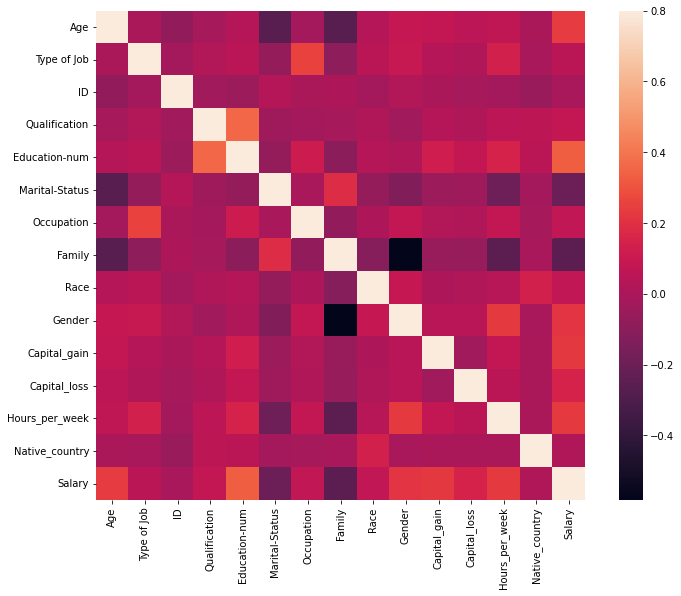

In [69]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

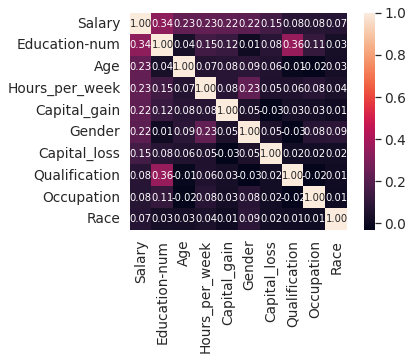

In [70]:
#Salary correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

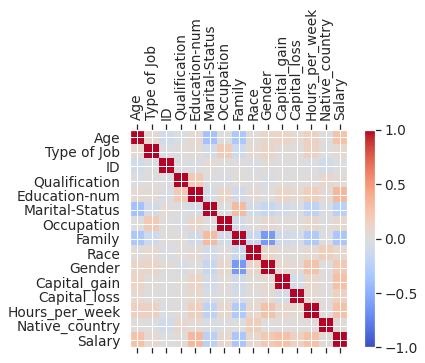

In [71]:
_ = xai.correlations(df, include_categorical=True, plot_type="matrix")

In [72]:
df.columns

Index(['Age', 'Type of Job', 'ID', 'Qualification', 'Education-num',
       'Marital-Status', 'Occupation', 'Family', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Salary'],
      dtype='object')

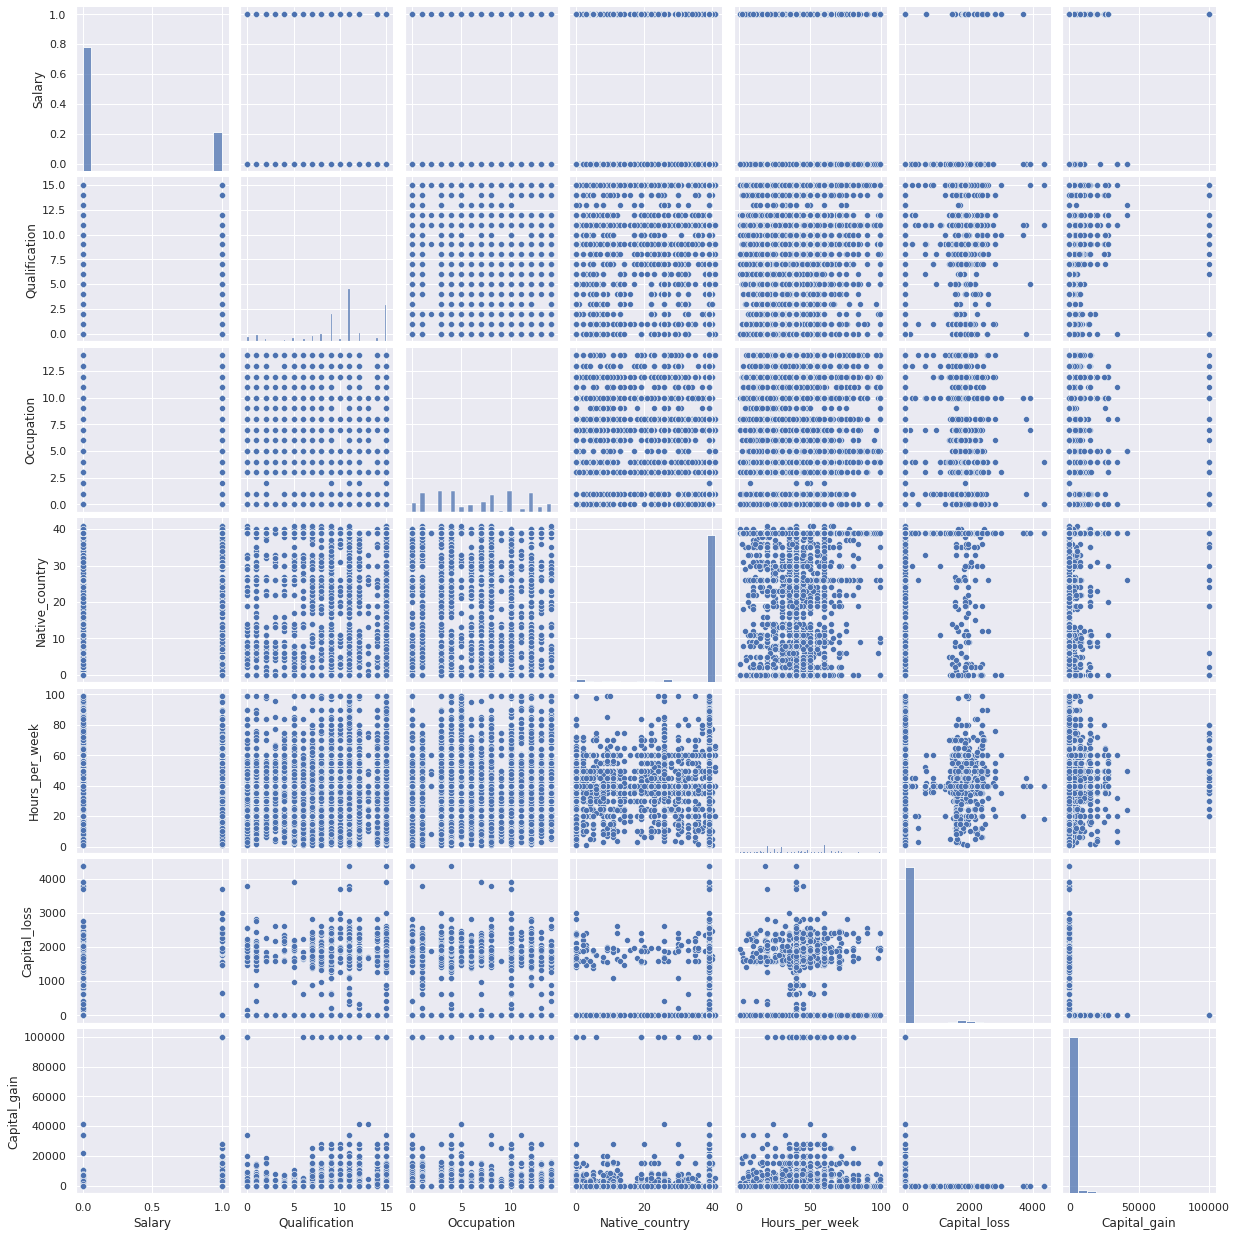

In [73]:
#scatterplot
sns.set()
cols = ['Salary', 'Qualification', 'Occupation', 'Native_country', 'Hours_per_week', 'Capital_loss', 'Capital_gain']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [74]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age,0,0.0
Type of Job,0,0.0
ID,0,0.0
Qualification,0,0.0
Education-num,0,0.0
Marital-Status,0,0.0
Occupation,0,0.0
Family,0,0.0
Race,0,0.0
Gender,0,0.0


In [75]:
df.isna().sum()

Age               0
Type of Job       0
ID                0
Qualification     0
Education-num     0
Marital-Status    0
Occupation        0
Family            0
Race              0
Gender            0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Salary            0
dtype: int64

Age                  AxesSubplot(0.125,0.125;0.0435393x0.755)
Type of Job       AxesSubplot(0.177247,0.125;0.0435393x0.755)
ID                AxesSubplot(0.229494,0.125;0.0435393x0.755)
Qualification     AxesSubplot(0.281742,0.125;0.0435393x0.755)
Education-num     AxesSubplot(0.333989,0.125;0.0435393x0.755)
Marital-Status    AxesSubplot(0.386236,0.125;0.0435393x0.755)
Occupation        AxesSubplot(0.438483,0.125;0.0435393x0.755)
Family             AxesSubplot(0.49073,0.125;0.0435393x0.755)
Race              AxesSubplot(0.542978,0.125;0.0435393x0.755)
Gender            AxesSubplot(0.595225,0.125;0.0435393x0.755)
Capital_gain      AxesSubplot(0.647472,0.125;0.0435393x0.755)
Capital_loss      AxesSubplot(0.699719,0.125;0.0435393x0.755)
Hours_per_week    AxesSubplot(0.751966,0.125;0.0435393x0.755)
Native_country    AxesSubplot(0.804213,0.125;0.0435393x0.755)
Salary            AxesSubplot(0.856461,0.125;0.0435393x0.755)
dtype: object

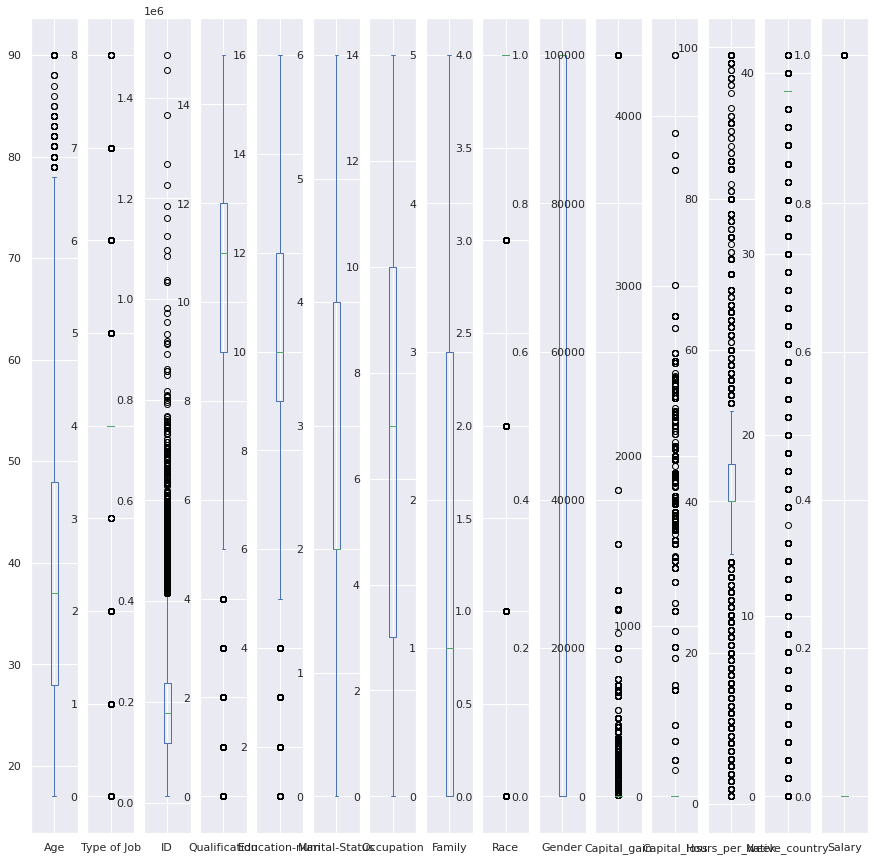

In [76]:
#outlayer
df.plot(kind='box',subplots=True,figsize=(15,15))

In [77]:
df.columns

Index(['Age', 'Type of Job', 'ID', 'Qualification', 'Education-num',
       'Marital-Status', 'Occupation', 'Family', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Salary'],
      dtype='object')

In [78]:
#remove outayer
p1=df.Hours_per_week.quantile(0.25)
p3=df.Hours_per_week.quantile(0.75)
IQR=p3-p1

In [79]:
l_limit=p1-1.5*IQR
U_limit=p3+1.5*IQR

In [80]:
df=df[df.Hours_per_week<U_limit]

In [81]:
p1=df.Native_country.quantile(0.25)
p3=df.Native_country.quantile(0.75)
IQR=p3-p1

l_limit=p1-1.5*IQR
U_limit=p3+1.5*IQR

df=df[df.Native_country<U_limit]

In [82]:
p1=df.Capital_loss.quantile(0.25)
p3=df.Capital_loss.quantile(0.75)
IQR=p3-p1

l_limit=p1-1.5*IQR
U_limit=p3+1.5*IQR

df=df[df.Capital_loss<U_limit]

In [83]:
p1=df.Capital_gain.quantile(0.25)
p3=df.Capital_gain.quantile(0.75)
IQR=p3-p1

l_limit=p1-1.5*IQR
U_limit=p3+1.5*IQR

df=df[df.Capital_gain<U_limit]

In [84]:
p1=df.Age.quantile(0.25)
p3=df.Age.quantile(0.75)
IQR=p3-p1

l_limit=p1-1.5*IQR
U_limit=p3+1.5*IQR

df=df[df.Age<U_limit]